# Mike's test case, multichannel

Begin by making a data file

In [1]:
import numpy as np
f = open('Test.dat','w')
for i in range(0,10000):
  print(i*0.01,np.random.random()+np.cos(i*0.01),np.random.random()+np.cos(i*0.01),np.random.random()*np.cos(i*0.01),file=f)

f.close()

### Now generate the SSA

In [2]:
import pyEXP
coefs = pyEXP.coefs.Coefs.factory('Test.dat')

# A list with one key.  Keys are integer arrays (or lists).  
# The first column of the data table has the key [0]
keylst = [[0]]
config = {"cosine": (coefs, keylst, [])}

# Window size is half the time series (a good default choice if it's practical)
window = int(len(coefs.Times())/2)

# Keep the first 10 PCs
npc = 10

flags = """
# Jacobi: true
# Traj: true
"""

# Initialize the MSSA and compute the eigenvalues
ssa = pyEXP.mssa.expMSSA(config, window, npc)
ev = ssa.eigenvalues()

---- Eigen is using 4 threads


---- Coefs::factory: error opening as HDF5, trying EXP native and ascii table
---- Coefs::factory: read ascii and created TableData


shape U = 5000 x 10


### Plot the eigenvalues

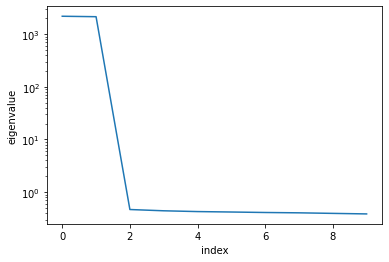

In [3]:
import matplotlib.pyplot as plt

plt.semilogy(ev, '-o')
plt.xlabel('index')
plt.ylabel('eigenvalue')
plt.show()

### Look at the first four PCs

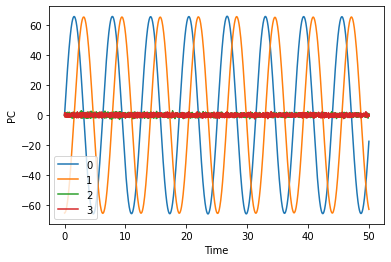

In [4]:
pc = ssa.getPC()
nt = pc.shape[0]
for i in range(4):
    plt.plot(coefs.Times()[:nt], pc[:,i], label=str(i))
plt.xlabel('Time')
plt.ylabel('PC')
plt.legend()
plt.show()

### Compute the power spectrum of the PCs

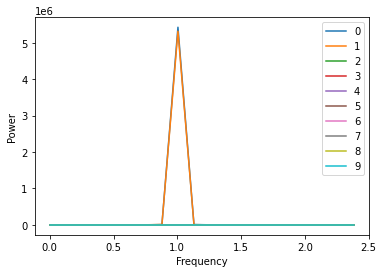

In [5]:
freq, power = ssa.pcDFT()
for i in range(power.shape[1]):
    plt.plot(freq[0:20], power[0:20,i], label=str(i))
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend()
plt.show()

We expect our power at $f=1$ and that's what we find!

### Compute the power spectrum of the reconstruction

In [7]:
ssa.reconstruct([0, 1])

# Show the available keys . . . 
print("Keylist is:", ssa.getRCkeys())

Keylist is: [[0, 0]]


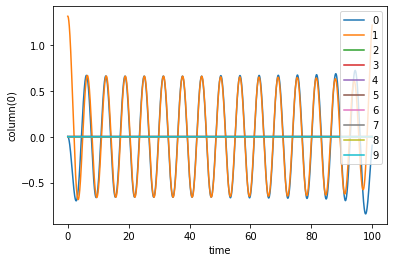

In [8]:
recon = ssa.getRC([0, 0])
for i in range(recon.shape[1]):
    plt.plot(coefs.Times(), recon[:,i], label=str(i))
plt.xlabel('time')
plt.ylabel('column(0)')
plt.legend()
plt.show()

Do the reconstruction for all available PCs

In [9]:
ssa.reconstruct([*range(npc)])

Now plot the power as before.

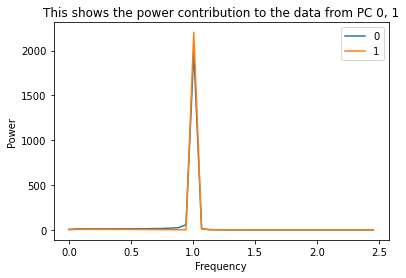

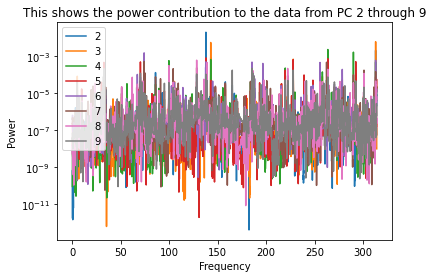

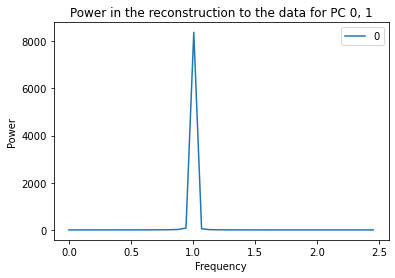

In [15]:
key = [0, 0] # First column, first data set

freq, power = ssa.singleDFT(key)

for i in range(2):
    plt.plot(freq[0:40], power[0:40,i], label=str(i))
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('This shows the power contribution to the data from PC 0, 1')
plt.legend()
plt.show()

for i in range(2, npc):
    plt.semilogy(freq, power[:,i], label=str(i))
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('This shows the power contribution to the data from PC 2 through 9')
plt.legend()
plt.show()

freq, power = ssa.channelDFT()
for i in range(power.shape[1]):
    plt.plot(freq[0:40], power[0:40,i], label=str(i))
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Power in the reconstruction to the data for PC 0, 1')
plt.legend()
plt.show()

This shows the power contribution to the data column 0 from each PC.  It's all PC 0, 1, of course, at the same frequency ($f=1$) as the PC itself.  The remaining power from the noise is spread into the remaining PCs.